# Title: DigiTalyer: Online Mekaniko for your Auto

## Abstract

In [100]:
# put abstract here

## Table of Contents

#### 1. Introduction

#### 2. Business Objective
* 2.1 Limitation

#### 3. Dataset
* 3.1 Schema (Columns)
* 3.2 Data Preview
* 3.3 Statistical Summary
* 3.4 Final Features

#### 4. Data Cleaning and Preparation

#### 5. Exploratory Data Analysis

#### 6. Data Preprocessing
* 6.1 Encoding

#### 7. Modelling
* 7.1 Model Fitting
* 7.2 Model Optimization and Hyperparameter Tuning
* 7.3 Metric and Result Interpretation
* 7.4 Test Prediction
* 7.5 Recommender Engine

#### 8. Final Result and Recommendation


##  1. Introduction 

In [101]:
# put introduction here

## 2. Business Objective

In [102]:
# put Business Objective here

### 2.1 Limitation

* For any Recommender Engine one of the limitation that it faces is the term 'Cold Start' where there is nothing to recommend for users that doesn't have any transaction history within the system. This also applies to our model, where the issue is that the recommeder engine will have a hard time recommending newer or latest car make, model and year because their data is non existent within the data set. This can be addressed by making another model which caters to all cars in general, a rather crude approach compared to the original recommender engine.


## 3. Dataset

### 3.1 Data Schema
###    The Original dataset was comprised of the following columns:
    
* Created - Input data date Creation.

* Mileage In - Total Mileage of the vehicle when brought into the repair shop.

* Mileage Out - Total Mileage of the vehicle when coming out of the repair shop.

* Work Order - Value to indicate the job/work order. Unique for every transactions.

* Model - Vehicle Model/Type.

* Engine - Engine Identification Number.

* Line Type - Kind of Services done; Can either be Labor or Material

* Service Category - Main Service package availed.

* Service Package - Service Category breakdown.

* Description - Work order brief description.

* Price - Price of the material or labor done.

* Quantity - Total number of materials purchased.

* Cost - Total cost of the materials purchased.

* Total - Total price of the material and labor done to the vehicle (discount exclusive).

* Part Number - Part ID that was replaced or serviced on.

* Manufacturer - Replacement part manufacture.

* Discount - Discounted amount from the total price.

* Net Total - Total price of the material and labor done to the vehicle (discount inclusive).

* VIN - Vehicle Identification Number.

* ContactID - Unique Identifier for the Vehicle owner.

* ServiceItemID - Unique Identifier for the Material/Parts. (local system)

* InvoiceID - Input data date Creation.

* Make - Vehicle Make/Brand (i.e. Honda, Mitsubishi, Hyundai, etc.)

* Year - Vehicle release year.

### 3.2 Dataset Preview
    

#### Importing the needed packages

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# reading the original CSV file
master_df = pd.read_csv('Final_Final 2.csv')

#### Total Number of Columns and Rows in the Data Set. 

In [105]:
# Shape of the Data set
master_df.shape

(30585, 23)

#### Previewing the Top and Last 5 entries of the Data set

In [117]:
master_df.head()

,Primary Key,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,...,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,Make,Year,labels,is_same_label,body type
0,17,2018-12-26 10:37:00,68624,33,getz,Material,Engine,PRIMARY CONCERN RECOMMENDATION - Cutch Repair ...,Rear Crankshaft Oil Seal,Engine Crankshaft Seal Kit,...,0.0,1119.40,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,hyundai,2010,Clutch General Service (Replacement of Clutch ...,False,HATCHBACK
1,18,2018-12-26 10:37:00,68624,33,getz,Labor,Engine,PRIMARY CONCERN RECOMMENDATION - Cutch Repair ...,Labor,NaN,...,0.0,5674.13,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,hyundai,2010,Clutch General Service (Replacement of Clutch ...,False,HATCHBACK
2,19,2018-12-26 10:37:00,68624,33,getz,Labor,Engine,PRIMARY CONCERN RECOMMENDATION - Re-seal Oil P...,Labor,NaN,...,0.0,1339.29,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,hyundai,2010,Engine Oil / Oil Filter,False,HATCHBACK
3,20,2018-12-26 10:37:00,68624,33,getz,Material,Engine,PRIMARY CONCERN RECOMMENDATION - Cutch Repair ...,Clutch Cover,NaN,...,0.0,2462.69,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,hyundai,2010,Clutch General Service (Replacement of Clutch ...,False,HATCHBACK
4,21,2018-12-26 10:37:00,68624,33,getz,Material,Engine,PRIMARY CONCERN RECOMMENDATION - Cutch Repair ...,GEARMASTER SAE 90,Automatic Transmission Fluid,...,0.0,559.71,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,hyundai,2010,Transmission Fluid Replacement & Filter Service,False,HATCHBACK


In [116]:
master_df.tail()

,Primary Key,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,...,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,Make,Year,labels,is_same_label,body type
30580,43003,2021-03-16 15:16:00,24616,2306,wigo,Labor,Change Oil,Change Oil Package - FULLY Synthetic (3L),Labor,NaN,...,0.0,446.43,fe2e472c-f023-4e6d-99a7-7a7f62507c29,f2acbad0-5080-4eb7-b8df-8b3d91cc3c24,47e97fa8-6590-4264-a0f4-3a7b58c5126f,toyota,2019,"Change oil, Lube and Flushing",True,HATCHBACK
30581,43004,2021-03-16 15:16:00,24616,2306,wigo,Material,Change Oil,Change Oil Package - FULLY Synthetic (3L),ENGINE FLUSHING,NaN,...,0.0,267.87,fe2e472c-f023-4e6d-99a7-7a7f62507c29,f2acbad0-5080-4eb7-b8df-8b3d91cc3c24,47e97fa8-6590-4264-a0f4-3a7b58c5126f,toyota,2019,"Change oil, Lube and Flushing",True,HATCHBACK
30582,43005,2021-03-16 15:16:00,24616,2306,wigo,Material,Change Oil,Change Oil Package - FULLY Synthetic (3L),REPSOL ELITE MULTIVALVULAS 10W40 - 1L,Engine Oil,...,0.0,1821.42,fe2e472c-f023-4e6d-99a7-7a7f62507c29,f2acbad0-5080-4eb7-b8df-8b3d91cc3c24,47e97fa8-6590-4264-a0f4-3a7b58c5126f,toyota,2019,"Change oil, Lube and Flushing",True,HATCHBACK
30583,43006,2021-03-16 15:16:00,24616,2306,wigo,Material,Change Oil,Change Oil Package - FULLY Synthetic (3L),OIL FILTER,NaN,...,0.0,428.57,fe2e472c-f023-4e6d-99a7-7a7f62507c29,f2acbad0-5080-4eb7-b8df-8b3d91cc3c24,47e97fa8-6590-4264-a0f4-3a7b58c5126f,toyota,2019,"Change oil, Lube and Flushing",True,HATCHBACK
30584,43007,2021-03-16 15:16:00,24616,2306,wigo,Material,Change Oil,Change Oil Package - FULLY Synthetic (3L),POWER COOLANT,NaN,...,0.0,178.57,fe2e472c-f023-4e6d-99a7-7a7f62507c29,f2acbad0-5080-4eb7-b8df-8b3d91cc3c24,47e97fa8-6590-4264-a0f4-3a7b58c5126f,toyota,2019,"Change oil, Lube and Flushing",True,HATCHBACK


#### Checking data types of the data

In [118]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30585 entries, 0 to 30584
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Primary Key       30585 non-null  int64  
 1   Created           30585 non-null  object 
 2   Mileage In        30585 non-null  int64  
 3   Work Order        30585 non-null  int64  
 4   Model             30585 non-null  object 
 5   Line Type         30585 non-null  object 
 6   Service Category  30585 non-null  object 
 7   Service Package   30563 non-null  object 
 8   Description       30585 non-null  object 
 9   Definition        13496 non-null  object 
 10  Price             30585 non-null  float64
 11  Quantity          30585 non-null  float64
 12  Total             30585 non-null  float64
 13  Discount          30585 non-null  float64
 14  Net Total         30585 non-null  float64
 15  ContactID         30585 non-null  object 
 16  ServiceItemID     30585 non-null  object

#### Total Number of Null Values in the dataset.
It can be seen that half of the features in the dataset have some null values in them.

In [109]:
master_df.isna().sum()

Primary Key             0
Created                 0
Mileage In              0
Work Order              0
Model                   0
Line Type               0
Service Category        0
Service Package        22
Description             0
Definition          17089
Price                   0
Quantity                0
Total                   0
Discount                0
Net Total               0
ContactID               0
ServiceItemID           0
InvoiceID               0
Make                    0
Year                    0
labels                  0
is_same_label           0
body type               0
dtype: int64

## 4. Data Cleaning and Preparation

#### The following steps was done for the Data Cleaning and Manipulation.


* The Make Column was first cleaned, multiple spelling errors was observed, replaced and the characters was converted to lowercase. 

* The Model Column was checked for input errors mainly on the spelling. The Make and Model was cleaned simulataneously because some of the row, if model is given the vehicle make can be provided but can't be done in reverse. all the null values are dropped.

* The Year Column also was cleaned, since some of the entry is blank the Vehicle Indentification Number (VIN) was used to decode when the vehicle was released. All the null values are dropped.

* The Mileage In was preserved, since there are no null values present.

* The Service Category has been split into three the 'Minor Preventive Maintenance', 'Major Preventive Maintenance' and the 'Change Oil' in preparation for the modelling process. 

### 4.1 Basic Statistical Summary

In [110]:
master_df.describe(include = 'all')

,Primary Key,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,...,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,Make,Year,labels,is_same_label,body type
count,30585.000000,30585,3.058500e+04,30585.000000,30585,30585,30585,30563,30585,13496,...,30585.000000,30585.000000,30585,30585,30585,30585,30585.000000,30585,30585,30585
unique,NaN,5166,NaN,NaN,176,3,17,3128,4757,431,...,NaN,NaN,2679,3117,5194,21,NaN,59,2,9
top,NaN,2019-07-17 09:33:00,NaN,NaN,vios,Material,Minor Preventive Maintenance Service,MINOR Preventive Maintenance Service,Labor,Engine Oil,...,NaN,NaN,2ada24ba-be69-4efd-a07b-309c2244803d,5269c830-5c47-4085-a097-dbdda0627059,2d877d25-d1cb-4a2f-9881-b544f76cc2c5,toyota,NaN,Minor Preventive Maintenance Service,True,SEDAN
freq,NaN,78,NaN,NaN,4217,23864,4757,1053,6060,2748,...,NaN,NaN,696,109,58,10820,NaN,8865,18638,10733
mean,21566.472748,NaN,7.776626e+04,3005.772209,NaN,NaN,NaN,NaN,NaN,NaN,...,42.670415,1288.884966,NaN,NaN,NaN,NaN,2012.661828,NaN,NaN,NaN
std,12338.950221,NaN,7.057198e+04,1807.436802,NaN,NaN,NaN,NaN,NaN,NaN,...,270.553205,2748.736023,NaN,NaN,NaN,NaN,4.033818,NaN,NaN,NaN
min,1.000000,NaN,0.000000e+00,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN
25%,11041.000000,NaN,3.940500e+04,1520.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,142.870000,NaN,NaN,NaN,NaN,2010.000000,NaN,NaN,NaN
50%,22237.000000,NaN,6.435900e+04,2869.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,607.140000,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN
75%,32058.000000,NaN,1.013470e+05,4412.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1428.570000,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN


* From the Basic Statistical Summary above, it can be seen that the vehicle make 'toyota' has the most number of  vehicle make in the dataset, 10,820 entries and for the model feature the 'vios' model has the highest count, 4,217 entries. For the service category, the 'minor preventive maintenance' has the highest entry.


## 5. Exploratory Data Analysis

Text(0, 0.5, 'Car Make')

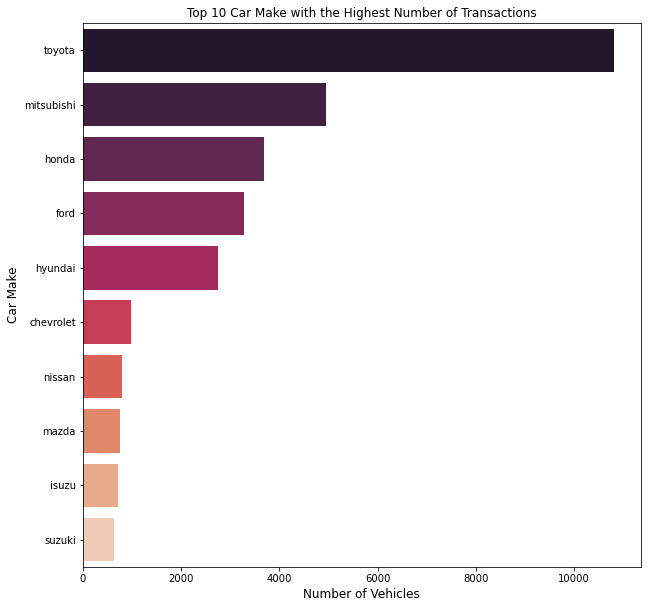

In [111]:
# Top 10 Car Make with the Highest Number of Transactions

vehicle_make = master_df['Make'].value_counts().sort_values(ascending=False).to_frame()[:10]
plt.figure(figsize = (10,10))
sns.barplot(y=vehicle_make.index, x=vehicle_make['Make'], orient='h', palette='rocket')
plt.title('Top 10 Car Make with the Highest Number of Transactions')
plt.xlabel('Number of Vehicles', size = 12)
plt.ylabel('Car Make', size = 12)

* Toyota topped the list of car manufacturers with the most service transactions. Reflective of Toyota’s almost 39% market share of total automotive sales in the Philippines and their parts availability in the market. Source: Statista.com


Text(0, 0.5, 'Service Packages')

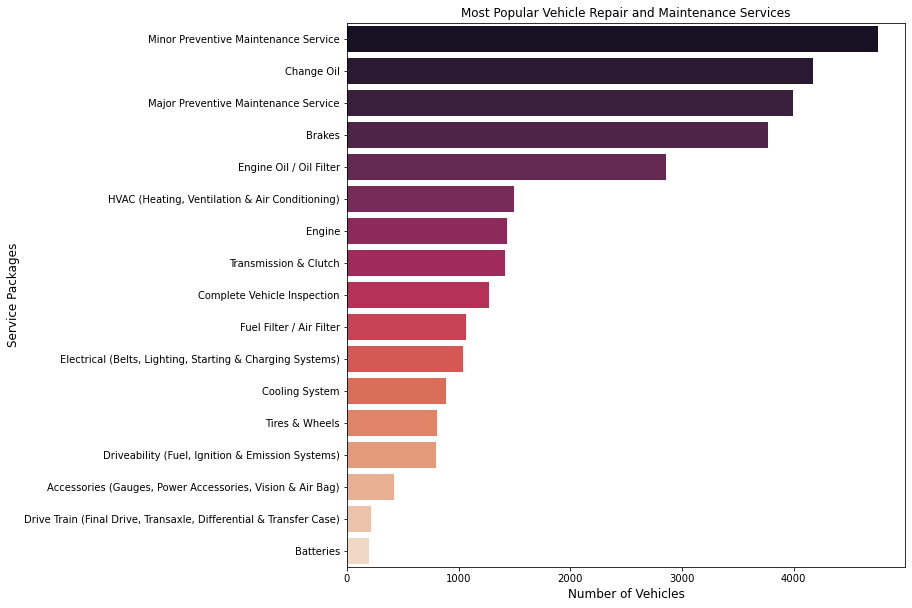

In [112]:
# Top 10 Car Make with the Highest Number of Transactions

vehicle_make = master_df['Service Category'].value_counts().sort_values(ascending=False).to_frame()
plt.figure(figsize = (10,10))
sns.barplot(y=vehicle_make.index, x=vehicle_make['Service Category'], orient='h', palette='rocket')
plt.title('Most Popular Vehicle Repair and Maintenance Services')
plt.xlabel('Number of Vehicles', size = 12)
plt.ylabel('Service Packages', size = 12)

* On average, 3 out of every 5 car owners go visit the car service centers for an Oil, Lube, & Preventive Maintenance Service.

* The recommended oil-change intervals for using mineral oil are at 3000 km, 5000 km, or six months (whichever comes first). Source: Top Gear Philippines


<AxesSubplot:title={'center':'Mean Cost of Maintenance for Toyota cars per Service Category'}, xlabel='Net Total', ylabel='Service Category'>

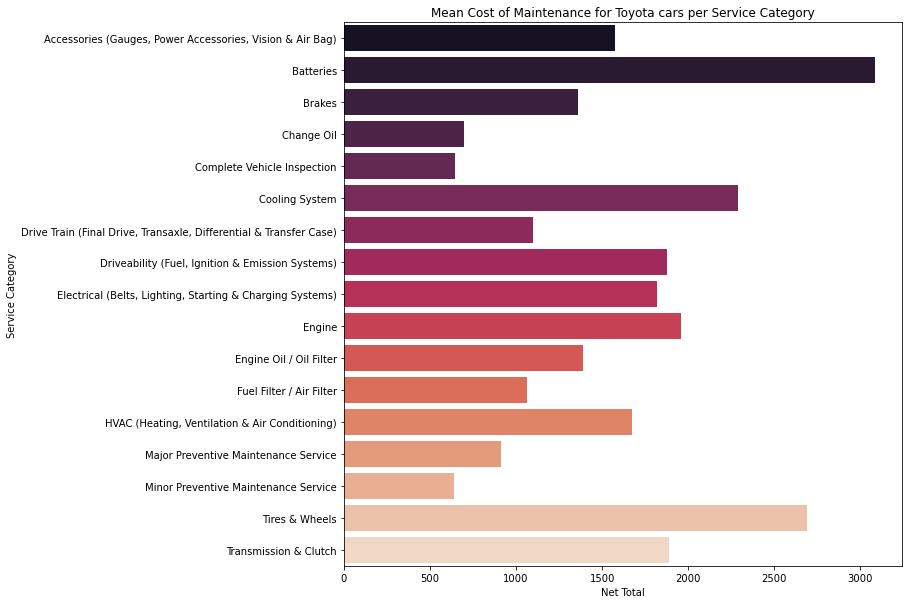

In [114]:
# Further Exploratory Data Analysis on the Toyota Brand
toyota_ = master_df[master_df['Make'] == 'toyota']

# mean value for each of service category offered by autoserved
toyota_cost_ownership = toyota_.groupby('Service Category')[['Net Total']].mean()

# Visualizations
plt.figure(figsize = (10,10))
plt.title("Mean Cost of Maintenance for Toyota cars per Service Category")
sns.barplot(y = toyota_cost_ownership.index, x = toyota_cost_ownership['Net Total'], orient = 'h', palette='rocket')